<a href="https://colab.research.google.com/github/chollingsworth1/LaGuardia-Data-Analytics/blob/main/NYPD_Arrest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#TO IMPORT PANDAS AND MATPLOTLIB
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#To Import NYPD_Arrest Data
from google.colab import files

upload = files.upload()

filename = next(iter(upload))

df=pd.read_csv(filename)

print(df.head())


Saving NYPD_Arrest.csv to NYPD_Arrest (1).csv
   ARREST_KEY ARREST_DATE  PD_CD            PD_DESC  KY_CD       OFNS_DESC  \
0   281369711   1/30/2024  177.0       SEXUAL ABUSE  116.0      SEX CRIMES   
1   284561406   3/30/2024  105.0  STRANGULATION 1ST  106.0  FELONY ASSAULT   
2   284896016    4/6/2024  105.0  STRANGULATION 1ST  106.0  FELONY ASSAULT   
3   285569016   4/18/2024  105.0  STRANGULATION 1ST  106.0  FELONY ASSAULT   
4   287308954   5/22/2024  464.0           JOSTLING  230.0        JOSTLING   

     LAW_CODE LAW_CAT_CD ARREST_BORO  ARREST_PRECINCT  JURISDICTION_CODE  \
0  PL 1306501          F           M               25                  0   
1  PL 1211200          F           B               44                  0   
2  PL 1211200          F           M               19                  0   
3  PL 1211200          F           K               69                  0   
4  PL 1652501          M           M               18                  0   

  AGE_GROUP PERP_SEX PERP_RA

In [5]:
# To pick any pick any zip code/neighborhood/district in this dataset as an
# initial comparison point

group1 = df[df['PERP_RACE'] == 'BLACK']['ARREST_BORO']
group2 = df[df['PERP_RACE'] == 'WHITE']['ARREST_BORO']

print(group1.describe())
print(group2.describe())



count     122049
unique         5
top            K
freq       40952
Name: ARREST_BORO, dtype: object
count     26161
unique        5
top           K
freq       8869
Name: ARREST_BORO, dtype: object


In [8]:
#compare above entity to any other (different) entity
df.groupby(['PERP_RACE'])['PERP_RACE'].count().sort_values(ascending=False)

,PERP_RACE
PERP_RACE,
BLACK,122049
WHITE HISPANIC,69131
BLACK HISPANIC,26549
WHITE,26161
ASIAN / PACIFIC ISLANDER,14838
UNKNOWN,956
AMERICAN INDIAN/ALASKAN NATIVE,819


In [6]:
#the analysis should include some descriptive statistics
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260503 entries, 0 to 260502
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                260503 non-null  int64  
 1   ARREST_DATE               260503 non-null  object 
 2   PD_CD                     260495 non-null  float64
 3   PD_DESC                   260503 non-null  object 
 4   KY_CD                     260471 non-null  float64
 5   OFNS_DESC                 260503 non-null  object 
 6   LAW_CODE                  260503 non-null  object 
 7   LAW_CAT_CD                259113 non-null  object 
 8   ARREST_BORO               260503 non-null  object 
 9   ARREST_PRECINCT           260503 non-null  int64  
 10  JURISDICTION_CODE         260503 non-null  int64  
 11  AGE_GROUP                 260503 non-null  object 
 12  PERP_SEX                  260503 non-null  object 
 13  PERP_RACE                 260503 non-null  o

In [7]:
#statistics data
df.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,2.605030e+05,260495.000000,260471.000000,260503.000000,260503.000000,2.605030e+05,260503.000000,260499.000000,260499.000000
mean,2.893983e+08,431.642008,252.544955,63.410936,0.904542,1.005552e+06,207816.822739,40.735495,-73.920132
std,5.439968e+06,271.557874,144.942419,34.955962,6.882318,2.203680e+04,29500.726774,0.265042,0.464304
min,2.797635e+08,2.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.252711
25%,2.847299e+08,117.000000,114.000000,40.000000,0.000000,9.907960e+05,185644.000000,40.676190,-73.976436
50%,2.894597e+08,397.000000,341.000000,63.000000,0.000000,1.005257e+06,206961.000000,40.734681,-73.924170
75%,2.941042e+08,705.000000,344.000000,101.000000,0.000000,1.017771e+06,235593.000000,40.813303,-73.879026
max,2.987485e+08,997.000000,995.000000,483.000000,97.000000,1.067220e+06,271282.000000,40.911236,0.000000


In [22]:
#the analysis should include one cleaning task (or more)
#to remove rows and columns with missing values
df.dropna()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,281369711,1/30/2024,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306501,F,M,25,0,25-44,M,BLACK,1000558,231080,40.800930,-73.941098,POINT (-73.9410982410066 40.8009303727402)
1,284561406,3/30/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,44,0,25-44,M,BLACK,1004297,242846,40.833209,-73.927554,POINT (-73.927554 40.833209)
2,284896016,4/6/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,19,0,25-44,M,BLACK,997304,222853,40.778348,-73.952863,POINT (-73.952863 40.778348)
3,285569016,4/18/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,69,0,25-44,M,BLACK,1010576,175628,40.648698,-73.905128,POINT (-73.905128 40.648698)
4,287308954,5/22/2024,464.0,JOSTLING,230.0,JOSTLING,PL 1652501,M,M,18,0,18-24,M,WHITE,991530,217373,40.763313,-73.973717,POINT (-73.973717 40.763313)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260498,298287970,12/20/2024,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,K,90,0,25-44,M,WHITE HISPANIC,998044,198865,40.712514,-73.950245,POINT (-73.950245 40.712514)
260499,298401282,12/23/2024,439.0,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553001,F,M,24,0,45-64,M,WHITE HISPANIC,991558,226956,40.789615,-73.973609,POINT (-73.9736085726657 40.78961486176856)
260500,298622307,12/30/2024,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL05110MU,M,K,67,0,25-44,M,BLACK,1003422,178505,40.656611,-73.930902,POINT (-73.93090206546258 40.65661089034527)
260501,298335810,12/21/2024,269.0,"MISCHIEF,CRIMINAL, UNCL 2ND",121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450501,F,Q,115,0,25-44,M,WHITE HISPANIC,1020035,213111,40.751545,-73.870843,POINT (-73.87084320922126 40.75154455706598)


In [9]:
#to group and count by race
Perp_race_= df.groupby(['PERP_RACE'])['PERP_RACE'].count().sort_values(ascending=False)

<Figure size 1000x600 with 0 Axes>

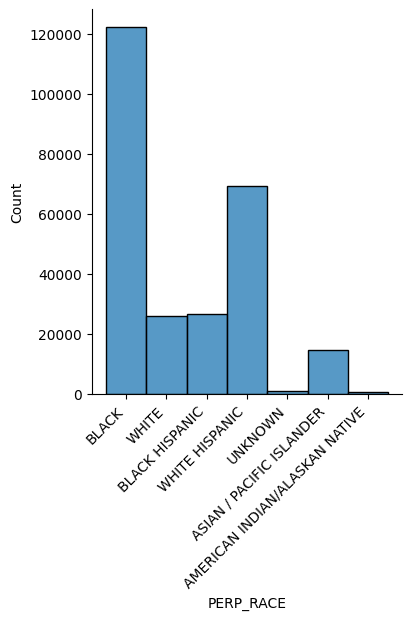

In [21]:
#Visiualization and adding space to x-axis for labeling to fit neatly
plt.figure(figsize=(10, 6))
sns.displot(df['PERP_RACE'])
plt.xticks(ticks=plt.xticks()[0], labels=plt.xticks()[1], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.2)
plt.show()

In [13]:
#conclusion
print("African Americans has the highest arrest rate amoung other races")

African Americans has the highest arrest rate amoung other races
